# Web scraping from KIA cars in Delhi

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import pandas as pd

# Setup Selenium WebDriver
driver = webdriver.Chrome() # To initialize the Chrome WebDriver
driver.get('https://www.cars24.com/buy-used-car?f=make%3A%3D%3Akia&sort=bestmatch&serveWarrantyCount=true&storeCityId=2')

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)

page_source = driver.page_source # Get the page source
driver.quit()

In [34]:
soup = BeautifulSoup(page_source, 'html.parser')
results = soup.find_all('a', {'class': 'IIJDn'})
cars_data = []
len(results)

32

In [7]:
# Loop through each listing to extract details
for result in results:
    name = result.find('h3').get_text()
    year_manufacture = result.find('h3').text.split()[0]
    km_driven = result.find('li').text
    specs = result.find('ul').find_all('li')
    fuel_type = specs[2].text
    transmission_type = specs[4].text
    price = result.find('strong').text

    # Append the car data to the list
    cars_data.append({
        'Name': name,
        'Year of Manufacture': year_manufacture,
        'Kilometers Driven': km_driven,
        'Fuel Type': fuel_type,
        'Transmission': transmission_type,
        'Price': price
    })

# Convert the list to a DataFrame
df_cars = pd.DataFrame(cars_data)

In [8]:
# Save the DataFrame to a CSV file
csv_file_path = 'Cars24.csv'
df_cars.to_csv(csv_file_path, index=False)

print(f"Data scraped and saved to '{csv_file_path}' successfully.")

Data scraped and saved to 'Cars24.csv' successfully.


# Data Analysis & Visualization

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Cars24.csv")

In [11]:
df

,Name,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission,Price
0,2021 KIA SELTOS HTK PLUS 1.5,2021,"30,964 km",Petrol,Manual,₹10.02 Lakh
1,2022 KIA SELTOS HTE 1.5 DIESEL,2022,"36,166 km",Diesel,Manual,₹11.03 Lakh
2,2019 KIA SELTOS HTK PLUS 1.5,2019,"27,143 km",Petrol,Manual,₹10.07 Lakh
3,2022 KIA SONET HTX 1.0 IMT,2022,"9,526 km",Petrol,Manual,₹10.60 Lakh
4,2020 KIA SONET HTK PLUS 1.5,2020,"35,537 km",Diesel,Manual,₹8.56 Lakh
5,2021 KIA SONET HTK PLUS 1.0 DCT,2021,"27,310 km",Petrol,Automatic,₹9.75 Lakh
6,2020 KIA CARNIVAL PREMIUM 2.2 7 STR,2020,"66,902 km",Diesel,Automatic,₹19.16 Lakh
7,2022 KIA SONET HTK PLUS 1.2,2022,"12,265 km",Petrol,Manual,₹8.95 Lakh
8,2020 KIA SONET HTK PLUS 1.5,2020,"67,883 km",Diesel,Manual,₹8.70 Lakh
9,2020 KIA SELTOS HTK PLUS AT 1.5 DIESEL,2020,"82,433 km",Diesel,Automatic,₹10.36 Lakh


In [12]:
# Get the shape of the DataFrame
df.shape

(32, 6)

In [13]:
# Prints the data types of the columns in given DataFrame.
print(df.dtypes)

Name                   object
Year of Manufacture     int64
Kilometers Driven      object
Fuel Type              object
Transmission           object
Price                  object
dtype: object


In [14]:
# first 10 rows of the DataFrame
df.head(10)

,Name,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission,Price
0,2021 KIA SELTOS HTK PLUS 1.5,2021,"30,964 km",Petrol,Manual,₹10.02 Lakh
1,2022 KIA SELTOS HTE 1.5 DIESEL,2022,"36,166 km",Diesel,Manual,₹11.03 Lakh
2,2019 KIA SELTOS HTK PLUS 1.5,2019,"27,143 km",Petrol,Manual,₹10.07 Lakh
3,2022 KIA SONET HTX 1.0 IMT,2022,"9,526 km",Petrol,Manual,₹10.60 Lakh
4,2020 KIA SONET HTK PLUS 1.5,2020,"35,537 km",Diesel,Manual,₹8.56 Lakh
5,2021 KIA SONET HTK PLUS 1.0 DCT,2021,"27,310 km",Petrol,Automatic,₹9.75 Lakh
6,2020 KIA CARNIVAL PREMIUM 2.2 7 STR,2020,"66,902 km",Diesel,Automatic,₹19.16 Lakh
7,2022 KIA SONET HTK PLUS 1.2,2022,"12,265 km",Petrol,Manual,₹8.95 Lakh
8,2020 KIA SONET HTK PLUS 1.5,2020,"67,883 km",Diesel,Manual,₹8.70 Lakh
9,2020 KIA SELTOS HTK PLUS AT 1.5 DIESEL,2020,"82,433 km",Diesel,Automatic,₹10.36 Lakh


In [15]:
# Describe the dataframe including all columns
df.describe(include = "all")

,Name,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission,Price
count,32,32.000000,32,32,32,32
unique,23,NaN,32,2,2,32
top,2022 KIA SONET HTX 1.0 IMT,NaN,"30,964 km",Petrol,Manual,₹10.02 Lakh
freq,5,NaN,1,22,24,1
mean,NaN,2021.062500,NaN,NaN,NaN,NaN
std,NaN,1.189673,NaN,NaN,NaN,NaN
min,NaN,2019.000000,NaN,NaN,NaN,NaN
25%,NaN,2020.000000,NaN,NaN,NaN,NaN
50%,NaN,2022.000000,NaN,NaN,NaN,NaN
75%,NaN,2022.000000,NaN,NaN,NaN,NaN


In [16]:
# Prints information about the given DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 32 non-null     object
 1   Year of Manufacture  32 non-null     int64 
 2   Kilometers Driven    32 non-null     object
 3   Fuel Type            32 non-null     object
 4   Transmission         32 non-null     object
 5   Price                32 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.6+ KB


In [17]:
# count of each fuel type in the given dataframe.
df['Fuel Type'].value_counts()

Fuel Type
Petrol    22
Diesel    10
Name: count, dtype: int64

In [18]:
df['Transmission'].value_counts()

Transmission
Manual       24
Automatic     8
Name: count, dtype: int64

In [19]:
df['Year of Manufacture'].unique()

array([2021, 2022, 2019, 2020, 2023])

In [20]:
df.isnull().sum()
df.isna().any()

Name                   False
Year of Manufacture    False
Kilometers Driven      False
Fuel Type              False
Transmission           False
Price                  False
dtype: bool

In [21]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['Year of Manufacture']
Categorical variables: ['Name', 'Kilometers Driven', 'Fuel Type', 'Transmission', 'Price']


In [22]:
# Count the number of categorical and numerical variables
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 5
Number of numerical variables: 1


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.columns

Index(['Name', 'Year of Manufacture', 'Kilometers Driven', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')

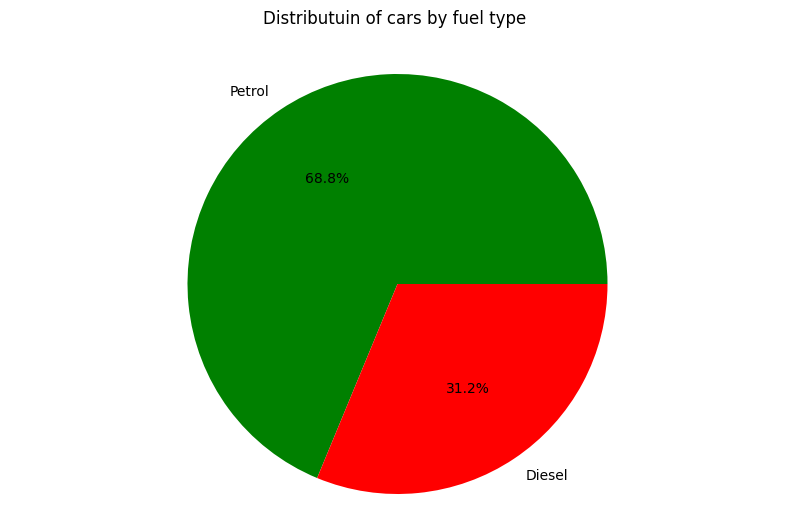

In [25]:
fuel_counts = df['Fuel Type'].value_counts().tolist()
labels = ["Petrol","Diesel"]

plt.figure(figsize=(10, 6))
plt.pie(fuel_counts, labels=labels, autopct='%1.1f%%' , colors=['green','red'])
plt.title('Distributuin of cars by fuel type \n')
plt.axis('equal')
plt.show()

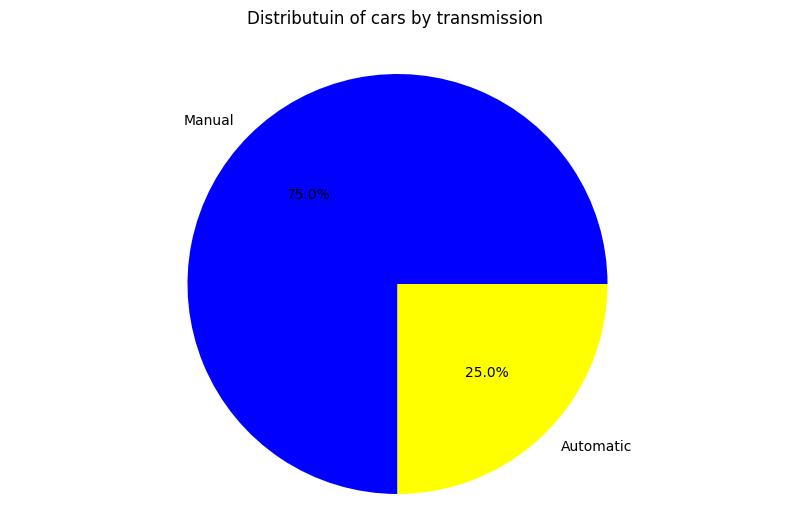

In [26]:
transmission_counts = df['Transmission'].value_counts()
labels = ["Manual","Automatic"]

plt.figure(figsize=(10, 6))
plt.pie(transmission_counts, labels=labels, autopct='%1.1f%%' , colors=['blue','yellow'])
plt.title('Distributuin of cars by transmission \n')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Count')

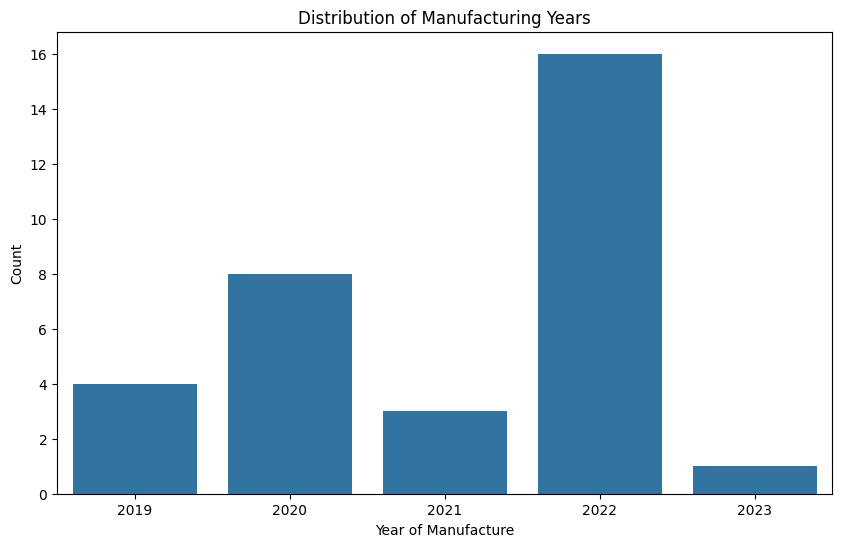

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year of Manufacture', data=df)
plt.title('Distribution of Manufacturing Years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

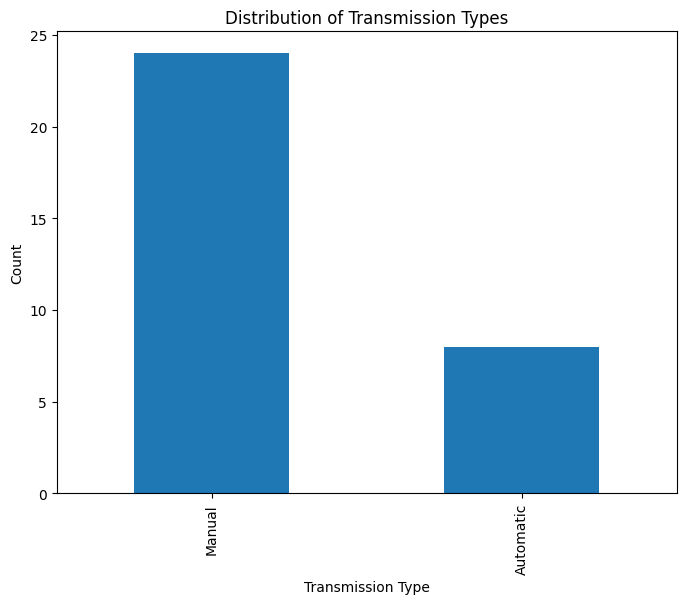

In [28]:
plt.figure(figsize=(8, 6))
df['Transmission'].value_counts().plot(kind='bar')
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

In [29]:
df['Price'] = df['Price'].str.replace('₹', '').str.replace('Lakh', '').astype(float)


In [30]:
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace(' km', '').str.replace(',', '').astype(int)

Text(0, 0.5, 'Price (Lakh ₹)')

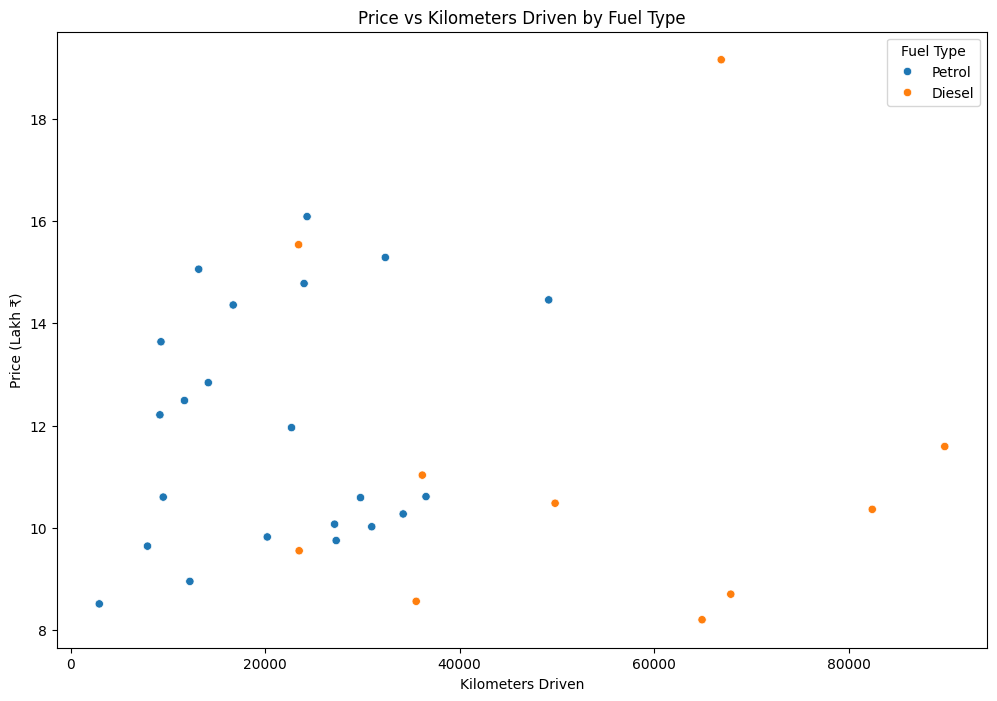

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Kilometers Driven', y='Price', hue='Fuel Type')
plt.title('Price vs Kilometers Driven by Fuel Type')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (Lakh ₹)')